In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
PlasticSales  = pd.read_csv("/content/PlasticSales.csv")

In [3]:
PlasticSales.head()

,Month,Sales
0,Jan-49,742
1,Feb-49,697
2,Mar-49,776
3,Apr-49,898
4,May-49,1030


In [4]:
PlasticSales.shape

(60, 2)

In [5]:
#Checking for null values

In [6]:
PlasticSales.isnull().sum()

Month    0
Sales    0
dtype: int64

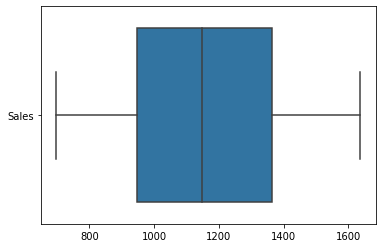

In [7]:
sns.boxplot(data=PlasticSales,orient="h")

In [8]:
PlasticSales['Month'] = pd.to_datetime(PlasticSales['Month'])
PlasticSales['months'] = PlasticSales['Month'].dt.strftime('%b')

In [9]:
PlasticSales.tail()

,Month,Sales,months
55,2053-08-01,1608,Aug
56,2053-09-01,1528,Sep
57,2053-10-01,1420,Oct
58,2053-11-01,1119,Nov
59,2053-12-01,1013,Dec


In [10]:
#creating dummies

In [11]:
months =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [12]:
month_dummies = pd.DataFrame(pd.get_dummies(PlasticSales['months']))
month_dummies
PlasticSales1 = pd.concat([PlasticSales,month_dummies],axis = 1)
PlasticSales1.head()

,Month,Sales,months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,2049-01-01,742,Jan,0,0,0,0,1,0,0,0,0,0,0,0
1,2049-02-01,697,Feb,0,0,0,1,0,0,0,0,0,0,0,0
2,2049-03-01,776,Mar,0,0,0,0,0,0,0,1,0,0,0,0
3,2049-04-01,898,Apr,1,0,0,0,0,0,0,0,0,0,0,0
4,2049-05-01,1030,May,0,0,0,0,0,0,0,0,1,0,0,0


In [13]:
PlasticSales1["t"] = np.arange(1,61)   
PlasticSales1["t_squared"] = PlasticSales1["t"]*PlasticSales1["t"] 
PlasticSales1["log_Sales"] = np.log(PlasticSales1["Sales"]) 
PlasticSales1.columns

Index(['Month', 'Sales', 'months', 'Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul',
       'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 't', 't_squared',
       'log_Sales'],
      dtype='object')

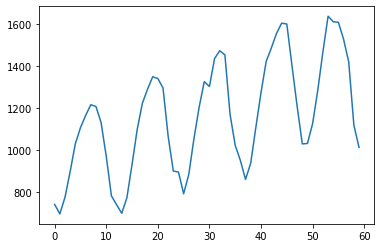

In [14]:
PlasticSales1.Sales.plot()
plt.show()

In [15]:
#Spliting data into train and test

In [16]:
train = PlasticSales1.head(48)
test = PlasticSales1.tail(12)

In [17]:
#Linear
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_linear))**2))
print("RMSE Linear: ",rmse_linear)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


RMSE Linear:  260.93781425111234


In [18]:
#Exponential
Exp = smf.ols('log_Sales~t',data=train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Exp)))**2))
print("RMSE Exponential: ",rmse_Exp)

RMSE Exponential:  268.6938385002599


In [19]:
Quad = smf.ols('Sales~t+t_squared',data=train).fit()
pred_Quad = pd.Series(Quad.predict(test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_Quad))**2))
print("RMSE Quadratic: ",rmse_Quad)

RMSE Quadratic:  297.4067097272046


In [20]:
add_seas = smf.ols('Sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
pred_add_seas = pd.Series(add_seas.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_seas = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_seas))**2))
print("RMSE Additive seasonality: ",rmse_add_seas)

RMSE Additive seasonality:  235.6026735664652


In [21]:
add_sea_Quad = smf.ols('Sales~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea_quad))**2))
print("RMSE Additive Seasonality Quadratic:",rmse_add_sea_quad )

RMSE Additive Seasonality Quadratic: 218.19387584893963


In [22]:
Mul_sea = smf.ols('log_Sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
print("RMSE Multiplicative Seasonality:",rmse_Mult_sea)

RMSE Multiplicative Seasonality: 239.65432143121137


In [23]:
Mul_Add_sea = smf.ols('log_Sales~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
print("RMSE Multiplicative Additive Seasonality:",rmse_Mult_add_sea )

RMSE Multiplicative Additive Seasonality: 160.6833294719326


In [24]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),
        "RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_seas,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,260.937814
1,rmse_Exp,268.693839
2,rmse_Quad,297.406710
3,rmse_add_sea,235.602674
4,rmse_add_sea_quad,218.193876
5,rmse_Mult_sea,239.654321
6,rmse_Mult_add_sea,160.683329


In [25]:
#Forecast for next 12 months

In [26]:
data = [['Jan-54', 'Jan'], ['Feb-54', 'Feb'], ['Mar-54', 'Mar'],['Apr-54', 'Apr'],['May-54', 'May'],['June-54', 'Jun'],
        ['Jul-54','Jul'],['Aug-54', 'Aug'],['Sep-54', 'Sep'],['Oct-54', 'Oct'],['Nov-54', 'Nov'],['Dec-54', 'Dec']]
forecast = pd.DataFrame(data, columns = ['Date', 'Months'])
forecast

,Date,Months
0,Jan-54,Jan
1,Feb-54,Feb
2,Mar-54,Mar
3,Apr-54,Apr
4,May-54,May
5,June-54,Jun
6,Jul-54,Jul
7,Aug-54,Aug
8,Sep-54,Sep
9,Oct-54,Oct


In [27]:
#Creating dummies

In [28]:
dummies = pd.DataFrame(pd.get_dummies(forecast['Months']))
forecast1 = pd.concat([forecast,dummies],axis = 1)
print("After dummy\n",forecast1.head())

forecast1["t"] = np.arange(1,13)   
forecast1["t_squared"] = forecast1["t"]*forecast1["t"] 
print("\nAfter T and T-Square\n",forecast1.head())

After dummy
      Date Months  Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep
0  Jan-54    Jan    0    0    0    0    1    0    0    0    0    0    0    0
1  Feb-54    Feb    0    0    0    1    0    0    0    0    0    0    0    0
2  Mar-54    Mar    0    0    0    0    0    0    0    1    0    0    0    0
3  Apr-54    Apr    1    0    0    0    0    0    0    0    0    0    0    0
4  May-54    May    0    0    0    0    0    0    0    0    1    0    0    0

After T and T-Square
      Date Months  Apr  Aug  Dec  Feb  ...  May  Nov  Oct  Sep  t  t_squared
0  Jan-54    Jan    0    0    0    0  ...    0    0    0    0  1          1
1  Feb-54    Feb    0    0    0    1  ...    0    0    0    0  2          4
2  Mar-54    Mar    0    0    0    0  ...    0    0    0    0  3          9
3  Apr-54    Apr    1    0    0    0  ...    0    0    0    0  4         16
4  May-54    May    0    0    0    0  ...    1    0    0    0  5         25

[5 rows x 16 columns]


In [29]:
# Forecasting using Multiplicative Additive Seasonality Model

model_full = smf.ols('log_Sales~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = PlasticSales1).fit()

pred_new  = pd.Series(model_full.predict(forecast1))
pred_new

forecast1["Forecasted_log"] = pd.Series(pred_new)
forecast1['Forecasted_Sales'] = np.exp(forecast1['Forecasted_log'])

In [30]:
#Prediction

In [31]:
Final_predict = forecast1.loc[:, ['Months', 'Forecasted_Sales']] 
Final_predict

,Months,Forecasted_Sales
0,Jan,735.511604
1,Feb,687.285730
2,Mar,758.119020
3,Apr,890.914100
4,May,1026.009386
5,Jun,1132.643225
6,Jul,1158.977050
7,Aug,1213.118530
8,Sep,1211.393367
9,Oct,1166.348313
